In [79]:
# Import libraries

import numpy as np # creating and manipulating arrays
import matplotlib.pyplot as plt # visualizing data
import sklearn # regression models
import statsmodels.api as sm 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pycaret.regression import *




In [80]:
# Import data and look at descriptive stats
df = pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [81]:
# Encoding --> convert categorical into quantitative
df = pd.read_csv("garments_worker_productivity.csv")

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

In [82]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,1,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [83]:
# Find missing values

df.describe()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,1.399332,1.369256,2.534670,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,1.215535,0.805909,1.714538,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.000000,0.000000,0.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.000000,1.000000,1.000000,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,1.000000,2.000000,3.000000,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2.000000,2.000000,4.000000,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,4.000000,2.000000,5.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [84]:
df.columns = ['date','quarter','department', 'day', 'team', 'targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change', 'no_of_workers','actual_productivity']

In [85]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,1,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [86]:
X = df.drop('date', axis =1)
X = X.drop('actual_productivity', axis =1)
X = X.drop('wip', axis =1)
Y = df[['actual_productivity']]

In [87]:
X

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,2,3,8,0.80,26.16,7080,98,0.0,0,0,59.0
1,0,1,3,1,0.75,3.94,960,0,0.0,0,0,8.0
2,0,2,3,11,0.80,11.41,3660,50,0.0,0,0,30.5
3,0,2,3,12,0.80,11.41,3660,50,0.0,0,0,30.5
4,0,2,3,6,0.80,25.90,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,10,0.75,2.90,960,0,0.0,0,0,8.0
1193,1,0,5,8,0.70,3.90,960,0,0.0,0,0,8.0
1194,1,0,5,7,0.65,3.90,960,0,0.0,0,0,8.0
1195,1,0,5,9,0.75,2.90,1800,0,0.0,0,0,15.0


In [88]:
model = sm.OLS(endog= y, exog= X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   0.960
Model:                             OLS   Adj. R-squared (uncentered):              0.960
Method:                  Least Squares   F-statistic:                              2371.
Date:                 Wed, 14 Sep 2022   Prob (F-statistic):                        0.00
Time:                         00:06:51   Log-Likelihood:                          563.81
No. Observations:                 1197   AIC:                                     -1104.
Df Residuals:                     1185   BIC:                                     -1043.
Df Model:                           12                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [90]:
#y_pred = pd.DataFrame(y_pred, columns = ['Predictions'])
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


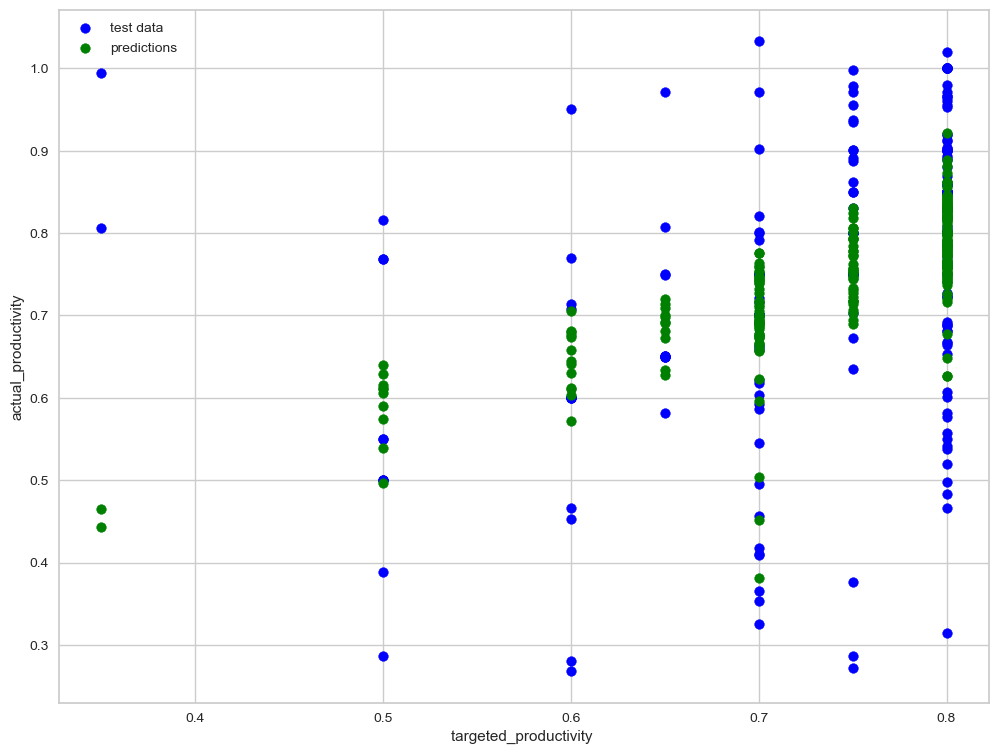

In [75]:
plt.scatter(X_test['targeted_productivity'], y_test, color = "blue", label = "test data")
plt.scatter(X_test['targeted_productivity'], y_pred, color = "green", label = "predictions")
plt.xlabel("targeted_productivity ")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [91]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.02215659555796888
Validation MSE:  0.08897407952559559
R-squared: 0.1778500264722641


In [92]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test = train_test_split(df, test_size = .2, random_state = 42)

In [93]:
s = setup(data = X_train, test_data = X_test, target = 'actual_productivity',numeric_features = [ 'quarter', 'department', 'day', 'team', 'targeted_productivity','smv','wip','over_time','incentive', 'no_of_workers'],  fold_strategy = 'timeseries', fold = 3, session_id = 123)

,Description,Value
0,Session id,123
1,Target,actual_productivity
2,Target type,Regression
3,Data shape,"(1197, 15)"
4,Train data shape,"(957, 15)"
5,Test data shape,"(240, 15)"
6,Numeric features,10
7,Categorical features,1
8,Rows with missing values,42.3%
9,Preprocess,True


In [94]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0885,0.0188,0.1363,0.3919,0.0836,0.1582,0.2233
rf,Random Forest Regressor,0.0893,0.0190,0.1369,0.3843,0.0839,0.1597,0.2833
gbr,Gradient Boosting Regressor,0.0929,0.0189,0.1365,0.3856,0.0836,0.1639,0.1567
lightgbm,Light Gradient Boosting Machine,0.0982,0.0198,0.1395,0.3564,0.0855,0.1722,0.1067
omp,Orthogonal Matching Pursuit,0.1108,0.0254,0.1593,0.1801,0.0975,0.1999,0.0267
ada,AdaBoost Regressor,0.1179,0.0244,0.1553,0.2073,0.0944,0.2006,0.1200
knn,K Neighbors Regressor,0.1285,0.0305,0.1745,0.0154,0.1064,0.2317,0.0700
dt,Decision Tree Regressor,0.1290,0.0436,0.2064,-0.4181,0.1269,0.2190,0.0300
lr,Linear Regression,0.1312,0.1561,0.3169,-4.2450,0.1211,0.2192,0.6700
lar,Least Angle Regression,0.1328,0.1734,0.3298,-4.8301,0.1226,0.2212,0.0267


In [95]:
predictions = predict_model(best, data = X_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0701,0.0122,0.1107,0.5388,0.0667,0.1113


In [58]:
predictions

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Label
921,0.748346,3.0,2.0,4.0,1.0,0.60,22.530001,708.000000,5040.0,0.0,0.0,0.0,1.0,42.0,0.268214,0.430343
321,0.691255,2.0,2.0,0.0,6.0,0.80,11.410000,1028.000000,4380.0,50.0,0.0,0.0,0.0,31.0,0.800359,0.794722
101,0.803163,0.0,1.0,4.0,8.0,0.80,2.900000,1188.442804,1440.0,0.0,0.0,0.0,0.0,8.0,0.681061,0.657427
920,0.744290,3.0,0.0,4.0,2.0,0.70,3.900000,1188.442804,960.0,0.0,0.0,0.0,0.0,8.0,0.325000,0.506468
58,0.804414,0.0,1.0,2.0,7.0,0.80,2.900000,1188.442804,960.0,0.0,0.0,0.0,0.0,8.0,0.667604,0.616916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0.657683,3.0,2.0,3.0,11.0,0.70,14.890000,1863.000000,10260.0,50.0,0.0,0.0,0.0,57.0,0.700170,0.692492
529,0.861566,4.0,1.0,1.0,8.0,0.65,3.940000,1188.442804,960.0,0.0,0.0,0.0,0.0,8.0,0.971867,0.914961
1069,0.699827,0.0,0.0,3.0,2.0,0.60,3.900000,1188.442804,960.0,0.0,0.0,0.0,0.0,8.0,0.950625,0.589792
649,0.830074,0.0,0.0,1.0,7.0,0.70,3.940000,1188.442804,1200.0,0.0,0.0,0.0,0.0,10.0,0.715767,0.826729


In [132]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [133]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [134]:
np.random.seed(0) 

data = 2 * np.random.rand(100, 1)
output = 4 + 3 * data + np.random.randn(100, 1)

data_new = np.array([[0], [2]]) 

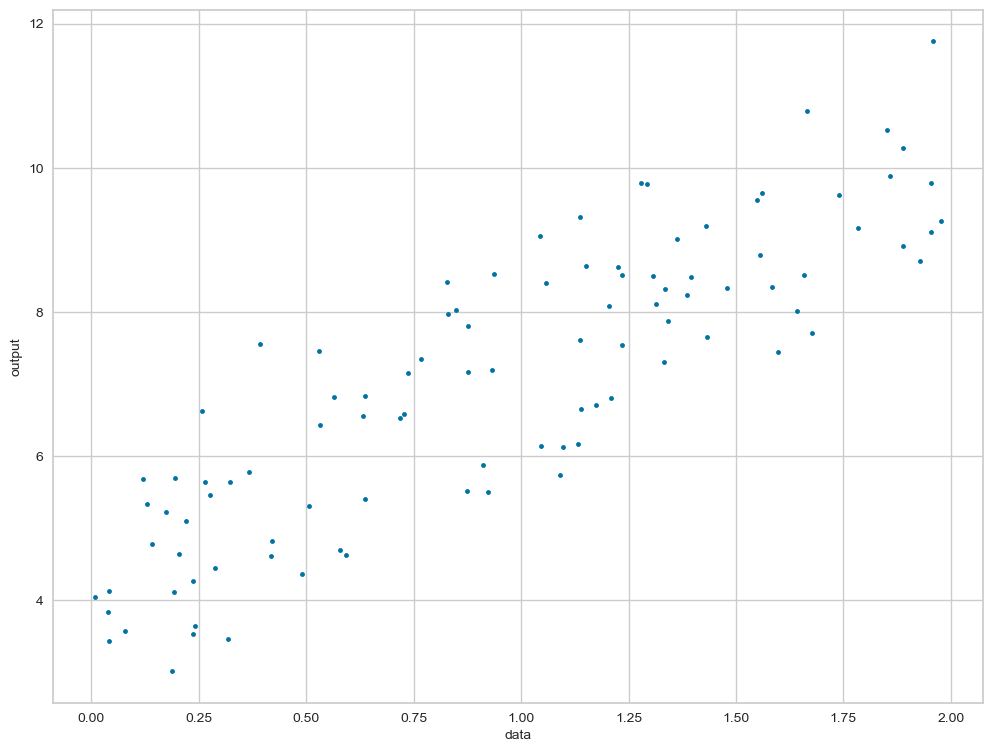

In [135]:
# Visualize the data 

plt.plot(data, output, "b.")
plt.xlabel("data", fontsize=10)
plt.ylabel("output", fontsize=10)
plt.show()

In [136]:
data_ols = sm.add_constant(data) # Add constant for the first value (intercept)
model = sm.OLS(endog= output, exog = data_ols)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.29e-31
Time:                        05:05:19   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2222      0.193     21.843      0.0

In [137]:
df_ols = sm.add_constant(data_new)
ols_output = results.get_prediction(df_ols).summary_frame(alpha=0.05)  

ols_output_list = ols_output['mean'].tolist()
ols_output_list

[4.222151077447228, 10.159086098849265]

In [173]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data, output)
lin_reg.intercept_, lin_reg.coef_

(array([4.22215108]), array([[2.96846751]]))

In [175]:
df =  np.array([[0], [2]]) 
sk_output = lin_reg.predict(df)

sk_output

array([[ 4.22215108],
       [10.1590861 ]])

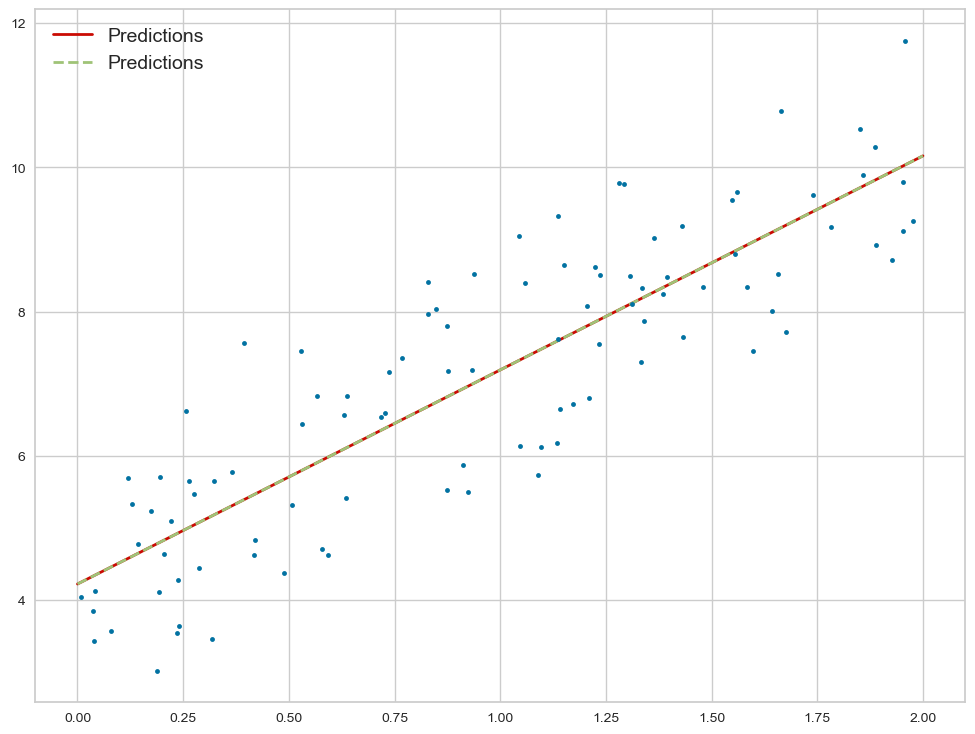

In [176]:
plt.plot(df, ols_output_list, "r-", linewidth=2, label="Predictions")
plt.plot(df, sk_output, "g-", linestyle='dashed', linewidth=2, label="Predictions")

plt.plot(data, output, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [177]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(data, output)
y_pred = reg.predict(df)

y_pred

array([ 4.19992303, 10.10756847])

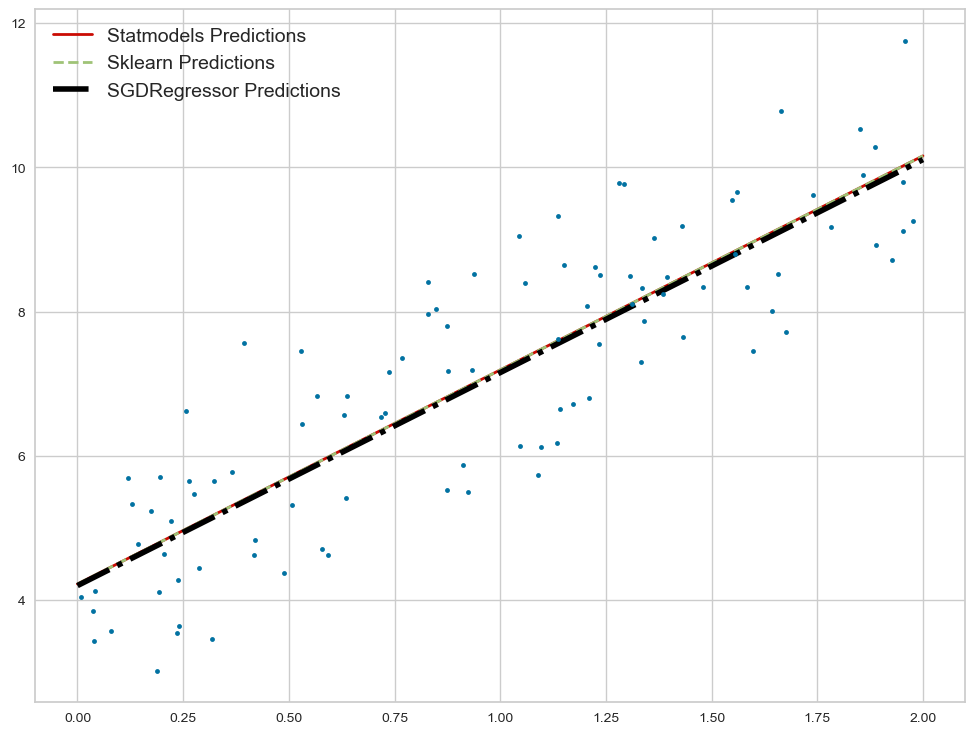

In [178]:
plt.plot(df, ols_output_list, "r-", linewidth=2, label="Statmodels Predictions")
plt.plot(df, sk_output, "g-", linestyle='dashed',  linewidth=2, label="Sklearn Predictions")
plt.plot(df, y_pred, "black", linestyle='dashdot',  linewidth=4, label="SGDRegressor Predictions")


plt.plot(data, output, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [179]:
# Encoding --> convert categorical into quantitative
df = pd.read_csv("garments_worker_productivity.csv")

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

X = df.drop('date', axis =1)
X = X.drop('actual_productivity', axis =1)
X = X.drop('wip', axis =1)
Y = df[['actual_productivity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .2, random_state = 42)

Polynomial Regression

In [182]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

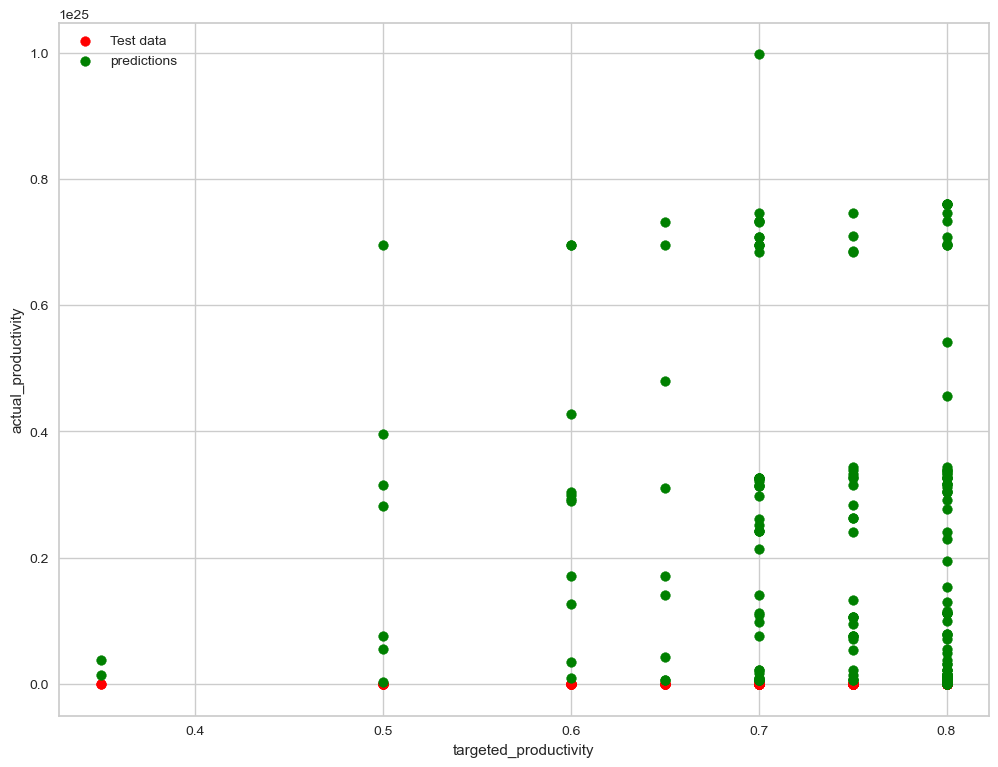

In [168]:
plt.scatter(X_test['targeted_productivity'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['targeted_productivity'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [183]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  1.2487656068477067e+49
Validation MSE:  1.1895381446609538e+49
R-squared: -3.982483666279684e+50


Ridge regression

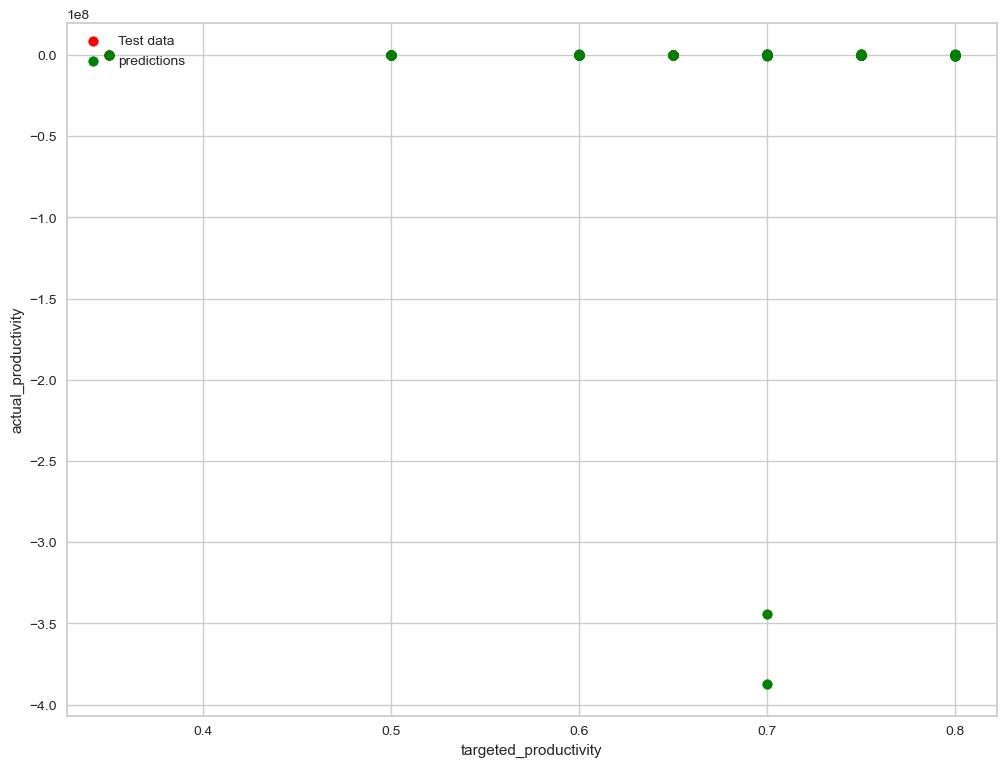

In [186]:
ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=42))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['targeted_productivity'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['targeted_productivity'], y_pred, color = "green", label = "predictions")
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [187]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
ridge_val_pred = ridge.predict(X_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores
scores = cross_validate(ridge, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  54124562901767.625
Validation MSE:  -523676980.24593276
R-squared: -5.0126663499371656e+16


ElasticNet Regression 

In [188]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  54065882084871.38
Validation MSE:  -511656632.5855017
R-squared: -5.007231914929258e+16


Lasso regression

In [189]:
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  53731295158992.266
Validation MSE:  -444862208.3488249
R-squared: -4.9762457781286744e+16
